# E-76 Obligated Federal Funds Data Exploration
### From the Division of Local Assistance 

E-76's or "Authorizations to Proceed" is a federal authorization of funds to establish the reimbursement date for a phase of work 

#### Data Sources: 
- [Obligated](https://dot.ca.gov/programs/local-assistance/reports/e-76-obligated)
- [Waiting](https://dot.ca.gov/programs/local-assistance/reports/e-76-waiting)

In this notebook, we will be looking to see what types of data is in the spreadsheet as well as begin to clean it for futher analysis


In [1]:
##one time load 
!pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [2]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup
import numpy as np

## Reading Excel as a data dictionary
Can use this approach, but recommend the next with second one. 

In [3]:
#obligated = pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=['2014-2018', '2019', '2020', '2021'])


In [4]:
#print(obligated)

In [5]:
#print(type(obligated))

In [6]:
#len(obligated)

In [7]:
#print(type(obligated['2020']))

In [8]:
#obligated['2020'].info()

In [9]:
#obligated['2021'].info()

In [10]:
#obligated['2019'].info()

In [11]:
#obligated['2014-2018'].info()

In [12]:
#df1 = obligated['2014-2018']
#df2 = obligated['2019']
#df3 = obligated['2020']
#df4 = obligated['2021']

In [13]:
#pd_dct = {"pre2018": df1, "2019": df2, "2020":df3, "2021":df4}

In [14]:
#mdf = pd.concat(pd_dct, axis=0).reset_index(level=0).rename({'level_0':'key'}, axis=1)

In [15]:
#mdf

## Reading Excel with Concat

In [3]:
#attempt 2
## code source: https://pbpython.com/pandas-excel-tabs.html
df = pd.concat(pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=None), ignore_index=True)


/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:68: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [7]:
df.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,9.0,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,...,7.0,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,...,6.0,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,...,0.0,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,...,0.0,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN


In [8]:
df.tail()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
20016,Obligated,BRLO,5955(095),Orange County,2021-08-20 00:00:00,2021-08-27 00:00:00,2021-08-31 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,82000.0,...,16.0,ORA020501,"Silverado Canyon Road Over Silverado Creek, Ap...",Bridge Replacement (tc).,2,2021-08-20 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20017,Obligated,HSIPL,5073(093),Orange,2021-08-17 00:00:00,2021-08-27 00:00:00,2021-08-30 00:00:00,2021-08-30 00:00:00,2021-09-08 00:00:00,21000.0,...,9.0,SCAG015,Intersection Of Glassell St. & Palmyra Ave.,Install A New 2-phase Traffic Signal,2,2021-07-28 00:00:00,2021-08-26 00:00:00,SCAG,NaT,NaN
20018,Obligated,HSIPL,5073(078),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.0,...,16.0,SCAG015,Intersection Of Glassell Street And Walnut Avenue,Protected Left-turn Signal Phasing,4,2021-08-13 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20019,Obligated,HSIPL,5073(080),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.0,...,16.0,SCAG015,Intersection Of Chapman Avenue And James Street,Install Protected Left Turn Signal Phasing,4,2021-08-12 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20020,Obligated,CMSTPLN,6071(129),Orange County Transportation Authority,2021-08-23 00:00:00,2021-08-24 00:00:00,2021-08-31 00:00:00,2021-08-31 00:00:00,2021-09-09 00:00:00,8000000.0,...,9.0,ORA100511,State Route 55 From Interstate 405 To Intersta...,Add One Mixed-flow And High-occupancy Lane In ...,6,2021-06-01 00:00:00,2021-08-22 00:00:00,SCAG,NaT,NaN


In [9]:
print(len(df))

20021


In [10]:
df.sample(10)

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
8735,Obligated,ER,18D2(005),Los Angeles County,2015-07-08,2015-07-09,2015-07-13,2015-07-13,2015-07-14,259405.68,...,1.0,NaN,"Mt Baldy Rd, East Fork Rd, Turnbull Canyon Rd","Debris Removal From Roadway,shoulders & Culverts;",1,NaN,NaN,SCAG,NaN,NaN
14092,Obligated,STPL,5385(056),Ridgecrest,2019-06-11 00:00:00,2019-06-11 00:00:00,2019-06-11 00:00:00,2019-06-11 00:00:00,2019-06-12 00:00:00,-5574.90,...,1.0,KER140407,South China Lake Blvd. From Bowman Rd. To Coll...,"Pavement Reinforcement, Asphalt Overlay, Ada R...",4,2019-06-06 00:00:00,NaT,KCOG,NaN,NaN
20015,Obligated,BRLO,5955(087),Orange County,2021-08-20 00:00:00,2021-08-30 00:00:00,2021-08-31 00:00:00,2021-09-01 00:00:00,2021-09-21 00:00:00,52000.00,...,20.0,ORA020501,"Silverado Canyon Road Over Ladd Creek, Br. No....",Bridge Replacement (tc),2,2021-08-20 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
12467,Obligated,CML,5952(157),Ventura,2014-03-21,2014-03-21,2014-03-21,2014-03-21,2014-03-21,0.00,...,0.0,VEN110306,On Lomita Ave From Rice Rd To S Lomita Ave,Construction Of 1.5 Miles Of Class Iii Bike Route,3,NaN,NaN,SCAG,NaN,NaN
12843,Obligated,STPL,5450(074),Santa Clarita,2014-01-29,2014-01-29,2014-02-03,2014-02-03,2014-02-03,0.00,...,0.0,LA11G1,Bouquet Canyon Road Between Magic Mountain Pa...,Rehabilitation And Resurfacing The Pavement.,3,NaN,NaN,SCAG,NaN,NaN
2582,Obligated,HSIPL,5044(095),Visalia,2018-01-29,2018-01-29,2018-01-29,2018-01-29,2018-01-31,0.00,...,2.0,TUL12-444,Intersection Of Ben Maddox Way And Douglas Avenue,Install Traffic Signal,3,NaN,NaN,TCAG,NaN,NaN
17571,Obligated,BRLS,5007(054),Santa Barbara,2020-11-06 00:00:00,2020-11-06 00:00:00,2020-11-06 00:00:00,2020-11-06 00:00:00,2020-11-23 00:00:00,-355929.87,...,17.0,CT14,Gutierrez St Bridge At Mission Creek (51c0132)...,Bridge Replacement,8,2020-10-29 00:00:00,2020-10-30 00:00:00,SBCG,NaN,NaN
2133,Obligated,HSIPL,5257(037),South Gate,2018-03-06,2018-03-07,2018-03-13,2018-03-15,2018-03-26,247500.00,...,11.0,SCAG015,Long Beach Blvd. From Santa Ana St. To Tweedy ...,Construct Raised Medians.,1,2018-02-22,2018-03-06,SCAG,NaN,NaN
15044,Obligated,ER,18D3(023),Highland,2019-09-25 00:00:00,2019-09-25 00:00:00,2019-09-25 00:00:00,2019-10-01 00:00:00,2019-10-09 00:00:00,0.00,...,8.0,NaN,Highland Avenue From Sr-210 To East Of Summert...,Emergency Opening. Eo Work: Mud And Debris Rem...,3,2019-09-19 00:00:00,2019-09-20 00:00:00,SCAG,NaN,NaN
16555,Obligated,CML,5950(457),Kern County,2020-05-11 00:00:00,2020-05-11 00:00:00,2020-05-13 00:00:00,2020-05-15 00:00:00,2020-05-21 00:00:00,-58123.29,...,6.0,KER180507,Union Ave From Casa Loma Dr. To Ming Ave To Fa...,Signal Coordination Interconnect.,2,2020-05-01 00:00:00,2020-05-05 00:00:00,KCOG,NaN,NaN


## Data Cleaning

In [11]:
df.Agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

Some Agencies are all caps, others are not. Applying str.title() to correct this. 

In [12]:
df.Agency = df.Agency.str.title()


In [13]:
df.Agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association Of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

In [14]:
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', None)

In [15]:
df.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,NaN,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,NaN,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,NaN,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,NaN,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN


In [16]:
df['Waiting Days'].unique()

array([nan])

In [17]:
df.drop('Waiting Days', axis=1, inplace=True)

In [18]:
df['Today'].unique()

array([nan, '2020-01-01', '2019-06-06 9:00 am', '2021-01-04',
       Timestamp('2021-10-01 00:00:00'), NaT], dtype=object)

In [19]:
df.drop('Today', axis=1, inplace=True)

In [20]:
df.drop('Unnamed: 28', axis=1, inplace=True)

In [21]:
df.rename(columns={'Project NO': 'project_no',
                        'Fed requested': 'fed_requested',
                        'AC requested': 'ac_requested',
                        'total requested': 'total_requested',
                        'FTIP No': 'ftip_no',
                        'project location': 'project_location'}, inplace=True)

In [22]:
df.rename(columns={'prepared date': 'prepared_date',
                        'submit  to HQ date': 'submit_to_hq_date',
                        'HQ review date': 'hq_review_date',
                        'submit to FHWA date': 'submit_to_fhwa_date',
                        'To FMIS date': 'to_fmis_date',
                        'Status Comment': 'status_comment',
                        'dist processing Days': 'dist_processing_days',
                        'HQ processing Days': 'hq_processing_days',
                        'FHWA processing Days': 'fhwa_processing_days',
                        'Type of Work': 'type_of_work',
                        'Date Request Initiated': 'date_request_initiated',
                        'date completed request': 'date_completed_request'}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20021 entries, 0 to 20020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                20021 non-null  object 
 1   PREFIX                  20021 non-null  object 
 2   project_no              20021 non-null  object 
 3   Agency                  20021 non-null  object 
 4   prepared_date           20011 non-null  object 
 5   submit_to_hq_date       20011 non-null  object 
 6   hq_review_date          20008 non-null  object 
 7   submit_to_fhwa_date     20012 non-null  object 
 8   to_fmis_date            20012 non-null  object 
 9   fed_requested           20020 non-null  float64
 10  ac_requested            20021 non-null  float64
 11  total_requested         20020 non-null  object 
 12  status_comment          20021 non-null  object 
 13  Locode                  18522 non-null  object 
 14  DIST                    20021 non-null

In [24]:
df['total_requested'] = df['total_requested'].astype(float)

ValueError: could not convert string to float: '2748.3NA999'

In [25]:
df.loc[df['total_requested']=='2748.3NA999']

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
15547,Obligated,ER,38Y0(001),Los Angeles County,2019-11-12 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-19 00:00:00,1017276.52,-1019159.54,2748.3NA999,Authorized,5953,7,E-76 approved on,28.00,2.00,13.00,NaN,"Mulholland Hwy, Et Al Guardrail Replacement","Install Temporary Traffic Signs, Remove And Re...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG


**Issue here**, and in the following row where 'NA' appears between numbers. Need to determine whether or not to manually override in the exel sheet. 

***Dropping rows with NA**

In [26]:
#https://stackoverflow.com/questions/53182464/pandas-delete-a-row-in-a-dataframe-based-on-a-value

delete_row = df[df["total_requested"]== '2748.3NA999'].index
df = df.drop(delete_row)

In [27]:
df['total_requested'] = df['total_requested'].astype(float)

ValueError: could not convert string to float: '30169.98NA99'

In [28]:
df.loc[df['total_requested']=='30169.98NA99']

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
15548,Obligated,ER,38Y0(003),Los Angeles County,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-20 00:00:00,1033518.07,-1001297.90,30169.98NA99,Authorized,5953,7,E-76 approved on,8.00,22.00,14.00,NaN,Kanan Dume Rd From Mm 8.15 To Mm 11.75,"Install Temporary Traffic Signs, Remove & Repl...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG


In [29]:
delete_row = df[df["total_requested"]== '30169.98NA99'].index
df = df.drop(delete_row)

In [30]:
df['total_requested'] = df['total_requested'].astype(float)


In [31]:
print(df['prepared_date'].dtypes)

object


In [32]:
df['prepared_date'].unique()

array(['2018-12-18', '2018-12-17', '2018-12-07', ...,
       Timestamp('2021-09-02 00:00:00'), Timestamp('2021-09-01 00:00:00'),
       Timestamp('2021-09-08 00:00:00')], dtype=object)

In [33]:
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit_to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))


In [34]:
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [36]:
df[["ProjectID", "ProjectNO"]] = df["project_no"].str.split(pat="(", expand=True)


In [37]:
df.ProjectNO = [x.replace(")", "") for x in df.ProjectNO]

In [38]:
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214


## Locode and Project ID Columns 

Hypothesis:
    Project IDs and Locodes, or unique agency identifiers, are the same 
    
As it stands now, these columns have a mix of letters and numbers, making it hard to compare the two. 
In this block we will work to convert these columns, while trying to not convert the non-numeric numbers. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [40]:
df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO
16853,Obligated,STPL,5196(042),Daly City,2020-06-22,2020-07-06,2020-07-09,2020-07-13,2020-07-16,0.00,0.00,-593207.09,Authorized,5196,4,E-76 approved on,14.00,7.00,3.00,SM-170023,Eastgate Drive From N. Mayfair Avenue To Glenw...,Street Resurfacing And Slurry Seal,2,2020-06-22,2020-06-22,MTC,5196,042
13063,Obligated,ER,32L0(325),Humboldt County,2019-01-10,2019-01-10,2019-02-21,2019-03-04,2019-03-06,22486.62,0.00,25400.00,Authorized,5904,1,E-76 approved on,1.00,53.00,2.00,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,1,2019-01-09,2019-01-09,NON-MPO,32L0,325
5637,Obligated,CML,5109(208),Bakersfield,2016-10-12,2016-10-12,2016-10-12,2016-10-12,2016-10-21,-8637.83,0.00,8419.21,Authorized,5109.00,6,E-76 approved on Prepared on 10/6/2015,0.00,0.00,9.00,KER120506,Jewetta & Reina Intersection,Traffic Signals & Lighting,3,NaT,NaT,KCOG,5109,208
10697,Obligated,STPLN,6054(072),Riv Co Trans Co,2014-04-15,2014-08-05,2014-10-06,2014-10-08,2014-10-15,-199556.00,0.00,-199556.00,Authorized,NaN,8,E-76 approved on E-76 approved on,112.00,64.00,7.00,RIV090902,I-215 From Blaine St. Sb Off-ramp To 0.3 I. So...,Extend The No. 4 Southbound Lane (tc),3,NaT,NaT,KCOG,6054,072
2075,Obligated,CML,5008(175),Stockton,2018-03-20,2018-03-21,2018-03-22,2018-03-22,2018-04-03,273038.00,0.00,308413.00,Authorized,5008.00,10,E-76 approved on,12.00,1.00,12.00,SJ14-8017,"In Stockton, Bear Creek And Pixley Slough Bicy...",Install And Upgrade Various Bicycle Facilities...,1,2018-03-09,2018-03-19,SJCG,5008,175
17724,Obligated,HSIPL,5045(032),Salinas,2020-12-14,2020-12-14,2020-12-14,2020-12-14,2020-12-18,0.00,0.00,0.00,Authorized,5045,5,E-76 approved on,0.00,0.00,4.00,HSIP08,Alisal Street Between Blanco And Front Streets,Intersection Improvements And Road Diet,3,2020-12-14,2020-12-14,AMBAG,5045,032
7219,Obligated,HSIPL,5044(095),Visalia,2016-03-01,2016-03-02,2016-03-03,2016-03-07,2016-03-11,0.00,0.00,28882.00,Authorized,5044.00,6,E-76 approved on Prepared on 10/6/2015,1.00,5.00,4.00,TUL12-444,Intersection Of Ben Maddox Way And Douglas Avenue,Install Traffic Signal,2,NaT,NaT,TCAG,5044,095
10740,Obligated,ER,24M0(007),Inyo,2014-08-21,2014-09-22,2014-09-22,2014-09-25,2014-09-26,101000.00,0.00,101000.00,Authorized,NaN,9,E-76 approved on E-76 approved on,32.00,3.00,1.00,NaN,Death Valley Rd. - Near Nunn Mt.,Emergency Opening,1,NaT,NaT,KCOG,24M0,007
893,Obligated,ER,30E0(009),Calaveras County,2018-06-29,2018-06-29,2018-07-27,2018-07-27,2018-08-02,1849.00,0.00,2089.00,Authorized,5930.00,10,E-76 approved on,3.00,28.00,6.00,NaN,Jesus Maria Rd Pm 2.3/2.4,Remove And Replace Burnt Guardrail Damaged By ...,1,2018-06-26,2018-06-26,NON-MPO,30E0,009
13479,Obligated,HRRRL,5923(105),Solano County,2019-04-17,2019-04-17,2019-04-17,2019-04-17,2019-04-19,-1.06,0.00,703583.36,Authorized,5923,4,E-76 approved on,6.00,0.00,2.00,VAR110007,Pleasants Valley Rd. Between Foothill Rd. And ...,Widen And Pave Shoulders,3,2019-04-11,2019-04-12,MTC,5923,105


In [41]:
## dataset has a column NBIL, 32L0, 40A0, 5.92E+03, 38Y0, 38R0

## for now, leaving the errors. 

In [107]:
def get_num(x):
    try:
        return int(x)
    except Exception:
        try:
            return float(x)
        except Exception:
            return x

        
# https://stackoverflow.com/questions/56474599/how-to-ignore-errors-in-pandas-to-numeric-and-change-str-to-int

In [43]:
df['Locode'] = df['Locode'].apply(get_num)

In [44]:
df['ProjectID'] = df['ProjectID'].apply(get_num)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [46]:
compare_col = np.where(df["Locode"] == df["ProjectID"], True, False)
df["compare_id_locode"] = compare_col
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121,True
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244,True
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214,True


In [47]:
df['compare_id_locode'].value_counts()

True     16316
False     3703
Name: compare_id_locode, dtype: int64

In [48]:
group = df.groupby('Agency')
crosswalk_all = group.apply(lambda x: x['Locode'].unique())
print(crosswalk_all)

Agency
Access Services                                               [6312]
Agoura Hills                                             [5435, nan]
Alameda                                                       [5014]
Alameda - Contra Costa Transit District                       [6002]
Alameda Corridor Transportation Authority                     [6246]
                                                      ...           
Yrts                                                           [nan]
Yuba City                                                     [5163]
Yuba County                                                   [5916]
Yucaipa                                      [5457, nan, 5954, NBIL]
Yucca Valley                                             [5466, nan]
Length: 667, dtype: object


In [79]:
## Convert to CSV to be used with other datasets. 
#crosswalk_all.to_csv('crosswalk_all.csv')

In [50]:
#https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

nan_rows = df[df['Locode'].isnull()]

In [51]:
nan_rows.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
12712,Obligated,STPTCIF,6071(061),Ora Co Trans Au,2013-09-25,2013-10-02,2014-02-21,2014-02-21,2014-02-21,-7388560.00,0.00,-11275392.00,Authorized,NaN,12,E-76 approved on E-76 approved on,7.00,142.00,0.00,ORA020826,"Tustin Avenue / Rose Drive From 1,100 Feet S/o...",New Overhead,6,NaT,NaT,SANDAG,6071,061,False
9954,Obligated,ATPLNI,5008(138),Stockton,2015-01-26,2015-01-26,2015-01-30,2015-02-04,2015-02-04,350000.00,0.00,350000.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,9.00,0.00,SJ07-5055,Citywide Within The City Of Stockton,Develop A Safe Route To School Plan(tc),1,NaT,NaT,SCAG,5008,138,False
9225,Obligated,CML,5059(210),Modesto,2015-05-07,2015-05-07,2015-05-08,2015-05-15,2015-05-18,65001.00,0.00,65001.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,8.00,3.00,08STA104,Modesto,Rideshare (tc),1,NaT,NaT,SCAG,5059,210,False
10710,Obligated,STPL,5384(015),Dst Hot Springs,2014-10-08,2014-10-08,2014-10-08,2014-10-08,2014-10-14,0.00,0.00,18449.95,Authorized,NaN,8,E-76 approved on E-76 approved on,0.00,0.00,6.00,RIV061161,Essential Road Improvements In Desert Hot Spri...,Road Rehabilitation,5,NaT,NaT,KCOG,5384,015,False
8688,Obligated,STPL,5058(093),Riverside,2015-03-16,2015-06-30,2015-07-15,2015-07-15,2015-07-19,1810000.00,0.00,2924903.00,Authorized,NaN,8,E-76 approved on E-76 approved on,106.00,15.00,4.00,RIV130401,Indiana Avenue From Vallejo Street To Auto Cen...,Road Rehabilitation,1,NaT,NaT,SCAG,5058,093,False
11360,Obligated,CML,5059(203),Modesto,2014-06-26,2014-06-26,2014-07-07,2014-07-09,2014-07-15,57544.00,0.00,64999.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,13.00,6.00,08STA104,City Of Modesto,Rideshare Program,1,NaT,NaT,MCAG,5059,203,False
12985,Obligated,RPSTPL,5240(029),Culver City,2013-12-20,2013-12-20,2013-12-30,2014-01-06,2014-01-06,0.00,0.00,-62001.00,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,17.00,0.00,LAF1659,Construction Of Safety And Aesthetic Relpedest...,"Ada Ramp, Crosswalk Pavement Treatment, Markin...",4,NaT,NaT,SCAG,5240,029,False
9255,Obligated,HSIPL,5939(096),Merced,2015-04-28,2015-04-29,2015-04-30,2015-05-13,2015-05-15,410667.00,0.00,410667.00,Authorized,NaN,10,E-76 approved on E-76 approved on,1.00,14.00,2.00,CM01,Winton Way And Gertrude Ave Intersection,Install Traffic Signals (tc),2,NaT,NaT,SCAG,5939,096,False
12386,Obligated,BRLO,5926(055),Amador,2014-03-14,2014-03-25,2014-03-26,2014-03-26,2014-03-27,100000.00,0.00,100000.00,Authorized,NaN,10,E-76 approved on E-76 approved on,11.00,1.00,1.00,HBPLOCAL,Carbondale Road Over Willow Creek (br 26c0030),Bridge Rehabilitation (tc),1,NaT,NaT,SCAG,5926,055,False
11683,Obligated,CML,5059(148),Modesto,2014-06-18,2014-06-18,2014-06-18,2014-06-18,2014-06-19,-24366.62,0.00,-13856.65,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,0.00,1.00,NaN,Various Locations In The City Of Modesto,Install And Upgrade Cctv Camer,3,NaT,NaT,SJCOG,5059,148,False


In [52]:
print(len(nan_rows))

1499


In [53]:
#checking to see if these NaN values are also in the downloadable data. 

In [54]:
# There are the same number of NaNs (1499) on the excel sheet. 
# So without these, there are still 2,206 

## Comparing columns and Summarizing Data
A preliminary exploration of the data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [56]:
df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
16964,Obligated,ACSTP,40A0(023),Lakeport,2019-11-25,2020-07-29,2020-08-11,2020-08-17,2020-08-21,0.00,7215.00,7215.00,Authorized,5076,1,E-76 approved on,247.00,19.00,4.00,NaN,"In The City Of Lakeport, South Main Street Fro...",Emergency Opening,1,2019-11-25,2020-07-29,NON-MPO,40A0,023,False
6151,Obligated,HPLUL,5006(540),Los Angeles,2016-07-28,2016-07-28,2016-07-28,2016-07-28,2016-08-03,-38681.64,0.00,-42197.30,Authorized,5006,7,E-76 approved on Prepared on 10/12/2015,0.00,0.00,6.00,LAE2651,Temple St - Hoover St To Glendale Blvd,Crosswalk Bump-outs & Related Streetscape,3,NaT,NaT,SCAG,5006,540,True
12795,Obligated,HSIPL,5427(026),Clearlake,2014-02-07,2014-02-10,2014-02-10,2014-02-10,2014-02-11,42750.00,0.00,47500.00,Authorized,5427,1,E-76 approved on E-76 approved on,3.00,0.00,1.00,RURALHSIP,Lakeshore Dr: Olympic Dr To Old Hwy 53; Olympi...,"Install Class Ii Bike Lanes, Striping & Reflec...",1,NaT,NaT,NON-MPO,5427,026,True
14898,Obligated,HSIPL,5479(062),Elk Grove,2019-08-30,2019-10-08,2019-10-08,2019-10-09,2019-10-18,57000.00,0.00,57000.00,Authorized,5479,3,E-76 approved on,40.00,1.00,9.00,SAC25157,"Bruceville Road At Laguna Creek Bridge, Sheldo...",Upgrade Guardrail To Current Standards,1,2019-08-29,2019-10-08,SACOG,5479,062,True
12085,Obligated,HSIPL,5211(029),El Cajon,2014-04-17,2014-04-18,2014-04-22,2014-04-23,2014-04-23,107900.00,0.00,120000.00,Authorized,NaN,11,E-76 approved on E-76 approved on,1.00,5.00,0.00,CAL105 / CAL306,Various Locations Throughout The City,Upgrade Signs,2,NaT,NaT,SJCOG,5211,029,False
7110,Obligated,CML,5278(015),Westmorland,2016-03-25,2016-03-25,2016-03-25,2016-03-25,2016-04-01,-950.00,0.00,11.00,Authorized,5278,11,E-76 approved on Prepared on 10/12/2015,0.00,0.00,7.00,IMP120626,Purchase Of New Cng Street Sweeper,Equipment Purchase,2,NaT,NaT,SCAG,5278,015,True
18538,Obligated,BRLO,5919(114),Placer County,2021-01-20,2021-03-10,2021-03-12,2021-03-19,2021-03-26,0.00,4100000.00,4100000.00,Authorized,5919,3,E-76 approved on,56.00,9.00,7.00,PLA25536,Crosby Harold Road Over Doty Creek 0.9 Miles N...,Replace 1-lane Bridge W/ A 2-lane Bridge (tc),4,2021-01-13,2021-03-10,SACOG,5919,114,True
10935,Obligated,STPL,5213(043),Sunnyvale,2014-08-28,2014-08-28,2014-08-28,2014-08-28,2014-08-28,0.00,0.00,57827.94,Authorized,5213,4,E-76 approved on E-76 approved on,0.00,0.00,0.00,SCL110024,Sunnyvale Ave/old San Francisco Intersection A...,Reconstruction Intersections,3,NaT,NaT,MTC,5213,043,True
797,Obligated,CML,5938(225),Stanislaus County,2018-07-19,2018-07-19,2018-08-09,2018-08-09,2018-08-15,300000.00,0.00,2419578.00,Authorized,5938,10,E-76 approved on,0.00,21.00,6.00,STANCOG,Intersection Of Carpenter Road And Whitemore A...,Construction Of Traffic Signal,2,2018-07-19,2018-07-19,STANCOG,5938,225,True
4495,Obligated,BPMPL,5929(257),San Joaquin County,2017-04-07,2017-04-18,2017-04-21,2017-04-26,2017-04-27,334643.00,0.00,378000.00,Authorized,5929,10,E-76 approved on Prepared on 2/14/2017,11.00,8.00,1.00,SJ07-3002,Walnut Grove Blvd (29c0010); Tracy Blvd (29c00...,Bridge Preventive Maintenance,3,NaT,NaT,SJCG,5929,257,True


In [57]:
from siuba.data import cars_sql
from siuba import group_by, mutate, show_query

In [58]:
df[_.compare_id_locode == False]

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False
21,Obligated,ACSTP,32L0(510),Butte County,2018-12-17,2018-12-20,2018-12-20,2018-12-20,2018-12-21,0.00,2986207.00,3367920.00,Authorized,5912,3,E-76 approved on,43.00,0.00,1.00,NaN,Oroville Quincy Hwy: Location #1 100 Yards Ab...,Emergency Opening And Restoration Of Roadway S...,1,2018-11-07,2018-11-07,BCAG,32L0,510,False
24,Obligated,ER,26E0(001),Napa County,2018-12-18,2018-12-18,2018-12-20,2018-12-20,2018-12-21,941474.00,0.00,1026469.00,Authorized,5921,4,E-76 approved on,13.00,2.00,1.00,NaN,Daf 1: Oak Knoll Ave (mpm 0.20); Daf 2: Oak Kn...,Napa County Earthquake Repair - Pavement Resto...,4,2018-11-30,2018-12-05,MTC,26.00,001,False
54,Obligated,ER,29P0(001),Carlsbad,2018-12-13,2018-12-13,2018-12-13,2018-12-14,2018-12-18,-61058.59,0.00,-53619.67,Authorized,5308,11,E-76 approved on,NaN,1.00,4.00,NaN,"Carlsbad Boulevard, North Of Las Encinas Creek",Emergency Revetment,2,NaT,NaT,SDAG,29P0,001,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19961,Obligated,ACSTP,40A0(076),Palm Springs,2021-08-10,2021-08-10,2021-08-17,2021-09-27,2021-09-27,0.00,263019.00,283856.00,Authorized,5275,8,E-76 approved on,1.00,48.00,0.00,NaN,Farrell Drive At Tahquitz Creek Wash (tc/mcc G...,"Removal Of Mud, Organic Debris, Pavement, Curb...",1,2021-08-09,2021-08-09,SCAG,40A0,076,False
19962,Obligated,ACSTP,40A0(077),Palm Springs,2021-08-10,2021-08-10,2021-08-17,2021-09-27,2021-09-27,0.00,61835.50,65509.00,Authorized,5275,8,E-76 approved on,1.00,48.00,0.00,NaN,Golf Club Road At Tahquitz Creek Golf Course C...,"Removal Of Mud And Debris, Set Up Traffic Cont...",1,2021-08-09,2021-08-09,SCAG,40A0,077,False
19970,Obligated,BR,NBIL(514),Rancho Mirage,2020-12-07,2021-08-31,2021-09-01,2021-09-03,2021-09-16,442650.00,0.00,500000.00,Authorized,5412,8,E-76 approved on,8.00,3.00,13.00,RIV050201,Frank Sinatra Drive Across The Whitewater Rive...,Replace 4-lane Low Water Crossing With 4-lane ...,4,2021-08-23,2021-08-23,SCAG,NBIL,514,False
20000,Obligated,BR,NBIL(516),Calaveras,2021-08-18,2021-08-18,2021-08-30,2021-09-03,2021-09-14,50000.00,0.00,50000.00,Authorized,5463,10,E-76 approved on,6.00,16.00,11.00,HBPLOCAL,Hogan Dam Road Over Bear Creek (lwc 00l0042),Low Water Crossing Replacement (tc),5,2021-08-12,2021-08-18,SCAG,NBIL,516,False


In [59]:
df['status_comment'].value_counts()

Authorized        19468
Prog Code Z400      147
Prog Code M400       73
Prog Code Z230       60
Prog Code Z003       40
Prog Code M40E       33
Prog Code M0E3       22
Prog Code M23E       17
Prog Code RPS9       14
Prog Code Z40E       14
Prog Code M230       14
Prog Code Z301       14
Prog Code M240       13
Prog Code L23E       10
Prog Code L40E        9
Prog Code Z240        9
Prog Code M003        8
Prog Code L230        6
Prog Code Z23E        6
prog code Z230        3
Prog Code L240        3
Prog Code L400        3
Prog Code L23R        3
Prog Code Z24E        3
Prog Code Q230        2
prog code Z240        2
Prog Code H230        2
Prog Code 33C0        2
Prog Code Z0E3        2
Prog Code M950        2
Prog Code Z300        2
Prog Code M301        2
Prog Code Z950        1
Prog Code M95E        1
Prog Code L24E        1
Prog Code RPS0        1
Prog Code M3E1        1
prog code Z24E        1
prog code             1
prog code Z400        1
Prog Code M30E        1
Prog Code Z233  

In [60]:
df['Location'].value_counts()

Obligated          19468
FTA Transferred      543
DISTRICT               5
HQ                     3
Name: Location, dtype: int64

In [61]:
df['type_of_work'].nunique()

6768

In [62]:
df['PREFIX'].nunique()

388

In [63]:
prefix = df['PREFIX'].value_counts()

In [64]:
prefix.head()

CML      3290
HSIPL    3245
STPL     2763
ER       1566
BRLO     1390
Name: PREFIX, dtype: int64

In [65]:
prefix.tail()

FSP11      1
ASCTP      1
CASB09     1
DEMO11     1
CASB905    1
Name: PREFIX, dtype: int64

In [66]:
prefix.sample(10)

DEM03L        2
BHLS        258
BRLS        904
DEM08STP      1
SRTS         11
HPLUNCI       2
ATPNIL        1
CASB803       1
TCSP08        1
HIPSTPL       2
Name: PREFIX, dtype: int64

In [67]:
print((prefix == 1).sum())

113


In [68]:
prefix.sort_index(inplace=True)
prefix

6140000      2
ACNHPI       2
ACST-ER    233
ACSTP      303
ASCTP        1
          ... 
VPPL        19
VPPP         3
VPPPL        5
VPPTCS       1
WZDXL20      1
Name: PREFIX, Length: 388, dtype: int64

In [78]:
##Getting a CSV to create a detailed crosswalk with defintions. 

#prefix.to_csv('count_grant_types.csv')

In [70]:
df[["dist_processing_days", "hq_processing_days", "fhwa_processing_days"]].describe()

,dist_processing_days,hq_processing_days,fhwa_processing_days
count,18307.00,20011.00,20011.00
mean,20.59,11.56,5.84
std,56.82,20.63,6.11
min,-216.00,0.00,-29.00
25%,0.00,0.00,2.00
50%,4.00,5.00,5.00
75%,15.00,14.00,8.00
max,1519.00,500.00,204.00


In [71]:
df[["fed_requested", "ac_requested", "total_requested"]].describe()

,fed_requested,ac_requested,total_requested
count,20018.00,20019.00,20018.00
mean,651399.64,45575.71,966230.58
std,4532551.93,3693922.24,16025962.24
min,-30000000.00,-168216336.00,-201391000.00
25%,0.00,0.00,0.00
50%,0.00,0.00,40000.00
75%,275000.00,0.00,369396.00
max,165000000.00,247009753.00,1900000000.00


In [72]:
df.agg({"fed_requested": ["min", "max", "median", "mean", "sum"], 
        "ac_requested": ["min", "max", "median", "mean", "sum"],
        "total_requested": ["min", "max", "median", "mean", "sum"]})

,fed_requested,ac_requested,total_requested
min,-30000000.00,-168216336.00,-201391000.00
max,165000000.00,247009753.00,1900000000.00
median,0.00,0.00,40000.00
mean,651399.64,45575.71,966230.58
sum,13039718011.88,912380058.35,19342003670.50


In [73]:
sumstat_mpo = df.groupby("MPO")[["fed_requested", "ac_requested", "total_requested"]].mean()

In [74]:
sumstat_mpo.head()

,fed_requested,ac_requested,total_requested
MPO,,,
AMBAG,218905.90,-1389.02,275096.99
BCAG,291881.70,100074.01,479992.11
CFCG,197973.78,7567.69,281513.40
COFCG,-139340.01,-1549.85,-310856.10
ER NONE,27414.77,0.00,142412.88


<AxesSubplot:xlabel='MPO'>

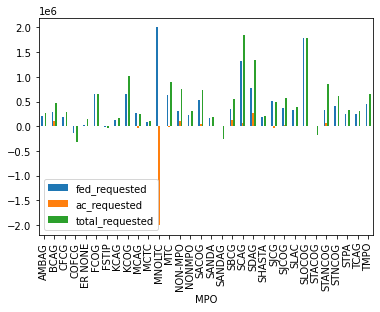

In [75]:
#quick plot to see large picture distribution of funds 
sumstat_mpo.plot.bar()

In [76]:
df.groupby("Agency")[["fed_requested", "ac_requested", "total_requested"]].mean().sort_values('total_requested')

,fed_requested,ac_requested,total_requested
Agency,,,
Alameda Corridor Transportation Authority,-1392639.96,0.00,-15818321.18
Santa Fe Springs,-0.53,0.00,-14714709.09
Rancho Cucamonga,-0.01,0.00,-3123124.48
Pomona,181144.84,0.00,-3112261.01
Grass Valley,56029.29,19262.99,-790810.52
...,...,...,...
Los Angeles County Metropolitan Transportation Authority,11704368.14,0.00,16981834.29
Riverside County Transportation Commission,9303768.53,131649.56,20643806.25
Orange County Transportation Authority,24325731.79,671278.96,29371595.76


In [87]:
##if you want a cleaned csv with just the obligated then export now. In the following cells, we will add the waiting data

#df.to_csv('clean.csv')

## Add Waiting dataset
This dataset includes the in progress obliations and the most recent obligations 


In [84]:
wdf = pd.concat(pd.read_excel('/home/jovyan/data-analyses/dla/e76_obligated_funds/data/E-76-Waiting-list.xlsx', sheet_name=None), ignore_index=True)


In [85]:
wdf.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Warning
0,DISTRICT,BPMP,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,43039.00,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,2021-11-01,NaN
1,DISTRICT,ATPL,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,10.00,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,NaT,NaN
2,DISTRICT,BPMP,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,88.00,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaT,NaN
3,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,49.00,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaT,NaN
4,DISTRICT,HSIPL,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,12.00,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,NaT,NaN


In [88]:
wdf.drop('Today', axis=1, inplace=True)

In [91]:
wdf.rename(columns={'Project NO': 'project_no',
                        'Fed requested': 'fed_requested',
                        'AC requested': 'ac_requested',
                        'total requested': 'total_requested',
                        'FTIP No': 'ftip_no',
                        'project location': 'project_location',
                        'prepared date': 'prepared_date',
                        'submit  to HQ date': 'submit_to_hq_date',
                        'HQ review date': 'hq_review_date',
                        'submit to FHWA date': 'submit_to_fhwa_date',
                        'To FMIS date': 'to_fmis_date',
                        'Status Comment': 'status_comment',
                        'dist processing Days': 'dist_processing_days',
                        'HQ processing Days': 'hq_processing_days',
                        'FHWA processing Days': 'fhwa_processing_days',
                        'Type of Work': 'type_of_work',
                        'Date Request Initiated': 'date_request_initiated',
                        'date completed request': 'date_completed_request'}, inplace=True)

In [98]:
wdf.Agency = wdf.Agency.str.title()

In [103]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                426 non-null    object        
 1   PREFIX                  426 non-null    object        
 2   project_no              426 non-null    object        
 3   Agency                  426 non-null    object        
 4   prepared_date           418 non-null    datetime64[ns]
 5   submit_to_hq_date       261 non-null    datetime64[ns]
 6   hq_review_date          232 non-null    datetime64[ns]
 7   submit_to_fhwa_date     210 non-null    datetime64[ns]
 8   to_fmis_date            210 non-null    datetime64[ns]
 9   fed_requested           426 non-null    float64       
 10  ac_requested            426 non-null    float64       
 11  total_requested         426 non-null    float64       
 12  status_comment          426 non-null    object    

In [125]:
wdf[["ProjectID", "ProjectNO"]] = wdf["project_no"].str.split(pat="(", expand=True)


In [126]:
wdf.ProjectNO = [x.replace(")", "") for x in wdf.ProjectNO]

In [132]:
wdf['Locode'] = wdf['Locode'].apply(get_num)
wdf['ProjectID'] = wdf['ProjectID'].apply(get_num)

In [133]:
compare_col2 = np.where(wdf["Locode"] == wdf["ProjectID"], True, False)
wdf["compare_id_locode"] = compare_col2
wdf.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,Waiting Days,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,Warning,ProjectID,ProjectNO,compare_id_locode
0,DISTRICT,BPMP,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,43039.00,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,NaN,5904,141,True
1,DISTRICT,ATPL,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,10.00,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,NaN,5904,151,True
2,DISTRICT,BPMP,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,88.00,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaN,5904,156,True
3,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,49.00,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True
4,DISTRICT,HSIPL,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,12.00,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,NaN,5904,181,True


In [134]:
wdf['compare_id_locode'].value_counts()

True     361
False     65
Name: compare_id_locode, dtype: int64

In [135]:
wdf['total_requested'] = wdf['total_requested'].astype(float)
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit_to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
wdf[cols] = wdf[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))


In [137]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                426 non-null    object        
 1   PREFIX                  426 non-null    object        
 2   project_no              426 non-null    object        
 3   Agency                  426 non-null    object        
 4   prepared_date           418 non-null    datetime64[ns]
 5   submit_to_hq_date       261 non-null    datetime64[ns]
 6   hq_review_date          232 non-null    datetime64[ns]
 7   submit_to_fhwa_date     210 non-null    datetime64[ns]
 8   to_fmis_date            210 non-null    datetime64[ns]
 9   fed_requested           426 non-null    float64       
 10  ac_requested            426 non-null    float64       
 11  total_requested         426 non-null    float64       
 12  status_comment          426 non-null    object    

In [138]:
combined_df = pd.concat([df, wdf], ignore_index=True)

In [139]:
combined_df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode,Waiting Days,Warning
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121,True,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244,True,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214,True,NaN,NaN


In [140]:
combined_df.tail()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode,Waiting Days,Warning
20440,DISTRICT,FTASTPL,6343(006),Mctd,NaT,NaT,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6343,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Bus Stops Improvement,1,NaT,NaT,MTC,6343,6,True,NaN,NaN
20441,DISTRICT,FTASTPL,6264(091),Vta,NaT,NaT,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6264,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Electronic Locker Upgrade And Replacement,1,NaT,NaT,MTC,6264,91,True,NaN,NaN
20442,DISTRICT,FTASTPL,6002(030),Ala-Con Costa T,NaT,NaT,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6002,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Quick Builds And Tempo Lane Delineation,1,NaT,NaT,MTC,6002,30,True,NaN,NaN
20443,HQ,CASB003,6190(033),Usda Forest Ser,2017-12-14,2017-12-14,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6190,7,FTA transferred waiting at HQ,NaN,NaN,NaN,NaN,FTA transfer,Fhwa Transfer: Corridor Management Planning,1,NaT,NaT,NON-MPO,6190,33,True,NaN,NaN
20444,DISTRICT,HSIPL,7504(001),Caltrans,NaT,NaT,NaT,NaT,NaT,351200.00,0.00,351200.00,prog code Z300,7504,11,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Guardrail Var. Locations,1,NaT,NaT,NaN,7504,1,True,NaN,NaN


In [144]:
combined_df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode,Waiting Days,Warning
11079,Obligated,HSIPL,5475(029),Citrus Heights,2014-05-19,2014-07-24,2014-08-05,2014-08-11,2014-08-12,814500.00,0.00,2084200.00,Authorized,5475,3,E-76 approved on E-76 approved on,66.00,18.00,1.00,VAR79010,Intersection Of Sunrise Ave And Sungarden Dr,"Install Traffic Signal, Sidewalks,ada Improvem...",2,NaT,NaT,SACOG,5475,029,True,NaN,NaN
15106,Obligated,ER,32L0(296),Humboldt County,2019-11-04,2019-11-04,2019-11-06,2019-11-06,2019-11-07,207620.55,-207620.55,0.00,Authorized,5904,1,E-76 approved on,0.00,2.00,1.00,NaN,"Alderpoint Road Pm 11.94, Humboldt County",Permanent Restoration,3,2019-11-04,2019-11-04,NON-MPO,32L0,296,False,NaN,NaN
6402,Obligated,HPLUL,5129(051),Oxnard,2016-06-24,2016-06-24,2016-06-24,2016-06-24,2016-07-05,-747290.95,0.00,2027366.47,Authorized,5129,7,E-76 approved on Prepared on 10/6/2015,0.00,0.00,11.00,NaN,Rice Ave./santa Clara Ave. At Highway 101,Reconstruct Interchange On Hwy,6,NaT,NaT,SCAG,5129,051,True,NaN,NaN
3774,FTA Transferred,FTACML,6292(014),Mountain Area Regional Transit Authority,2017-07-14,2017-07-14,2017-07-14,2017-08-02,2017-08-10,397205.00,0.00,397205.00,Prog Code Z400,6292,8,FTA transferred on 8/10/2017,NaN,19.00,8.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,6292,014,True,NaN,NaN
13614,Obligated,BHLO,5944(099),Monterey County,2018-11-28,2019-01-10,2019-01-15,2019-01-15,2019-01-17,275000.00,0.00,275000.00,Authorized,5944,5,E-76 approved on,52.00,5.00,2.00,GP_HBRR,Robinson Canyon Bridge At Carmel River,Scour Protection (tc),4,2018-11-19,2018-11-19,AMBAG,5944,099,True,NaN,NaN
18840,Obligated,RPSTPL,5005(130),San Jose,2021-04-22,2021-04-22,2021-04-23,2021-04-23,2021-04-27,-26.58,0.00,1179503.47,Authorized,5005,4,E-76 approved on,7.00,1.00,4.00,SCL110117,Park Avenue: Hedding St To Montgomery St,Pedestrian And Improvements (tc),4,2021-04-15,2021-04-16,MTC,5005,130,True,NaN,NaN
8405,Obligated,HSIPL,5044(095),Visalia,2015-07-27,2015-08-17,2015-08-17,2015-08-25,2015-08-25,309900.00,0.00,608134.00,Authorized,5044,6,E-76 approved on E-76 approved on,21.00,8.00,0.00,TUL12-444,Intersection Of Ben Maddox Way And Douglas Avenue,Install Traffic Signal,1,NaT,NaT,TCAG,5044,095,True,NaN,NaN
4231,Obligated,HSIPL,5441(070),Moreno Valley,2017-05-17,2017-05-18,2017-05-30,2017-06-02,2017-06-15,194975.00,0.00,194975.00,Authorized,5441,8,E-76 approved on,15.00,15.00,13.00,SCAG015,Throughout The City Of Moreno Valley,Upgrade Guardrail Installations At 22 Locations,1,2017-05-03,NaT,SCAG,5441,070,True,NaN,NaN
15619,Obligated,ER,32L0(185),Humboldt County,2020-01-22,2020-01-22,2020-01-22,2020-01-22,2020-01-23,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,6.00,0.00,1.00,NaN,Kneeland Road Pm 34.96,Emergency Opening,3,2020-01-16,2020-01-17,NON-MPO,32L0,185,False,NaN,NaN
1613,Obligated,BRLO,5919(066),Placer County,2018-03-22,2018-03-28,2018-04-27,2018-04-30,2018-05-14,-2434493.00,0.00,-2195469.00,Authorized,5919,3,E-76 approved on,6.00,33.00,14.00,VAR79008,Alpine Meadows Rd Over Truckee Riv Br#19c-151,Bridge Replacement (tc),6,2018-03-22,2018-03-22,SACOG,5919,066,True,NaN,NaN


In [145]:
group2 = combined_df.groupby('Agency')
crosswalk_waiting_and_obligated = group2.apply(lambda x: x['Locode'].unique())
print(crosswalk_waiting_and_obligated)

Agency
Access Services                                             [6312]
Agoura Hills                                           [5435, nan]
Ala-Con Costa T                                             [6002]
Alameda                                                     [5014]
Alameda - Contra Costa Transit District                     [6002]
                                                    ...           
Yrts                                                         [nan]
Yuba City                                                   [5163]
Yuba County                                                 [5916]
Yucaipa                                    [5457, nan, 5954, NBIL]
Yucca Valley                                           [5466, nan]
Length: 671, dtype: object


In [146]:
## Convert to csv to use for additonal datasets

#crosswalk_waiting_and_obligated.to_csv('crosswalk_waiting_and_obligated.csv')

In [154]:
prefix_waiting_obligated = combined_df['PREFIX'].value_counts()
print(prefix_waiting_obligated)

CML        3334
HSIPL      3331
STPL       2810
ER         1607
BRLO       1416
           ... 
CASB09        1
DEMO11        1
TCIFESP       1
RPSTPL-       1
FTACRRS       1
Name: PREFIX, Length: 392, dtype: int64


In [155]:
##Getting a CSV to create a detailed crosswalk with defintions. 

#prefix_waiting_obligated.to_csv('count_grant_types_waiting_obligated.csv')

## Convert to CSV for future analysis 

In [157]:
##if you want a cleaned csv with just the obligated then export now. In the following cells, we will add the waiting data

combined_df.to_csv('clean_waiting_obligated.csv')